C:\Users\playn\AppData\Local\Temp\ipykernel_12280\2524990050.py:17: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, None]


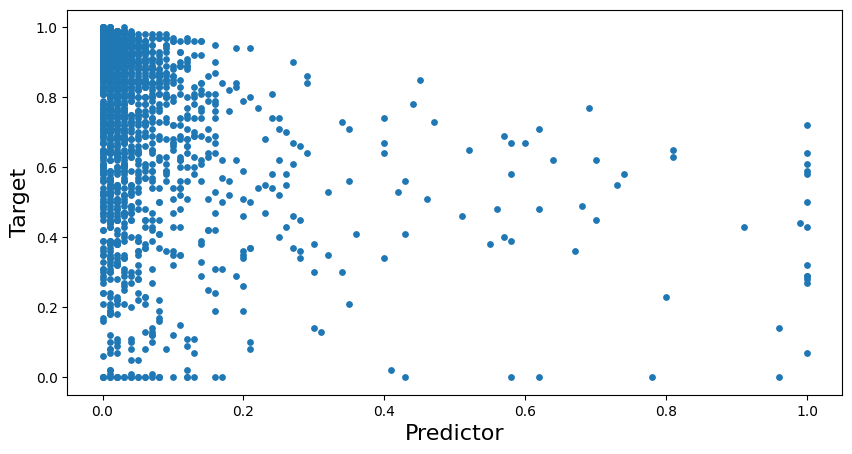

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from numpy import genfromtxt

ds=pd.read_csv('communities.csv')
df=ds.drop(['8','?','?.1'],axis=1, inplace=True)
df=ds.replace('?','0')
df
x=df["0.19"] = df['0.19'].astype('float64')
y=df["0.9"] = df['0.9'].astype('float64')
X = x[:, None]
plt.figure(figsize=(10,5))
plt.scatter(X,y,s=15)
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
                                              
print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [1486    8]
Количество строк в y_test по классам: [495   4]


In [81]:
lr = LinearRegression()
lr.fit(X, y)


print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.09
Linear Regression-Test set score: 0.09


In [82]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
print(f"Lasso Regression-Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Lasso Regression-Test set score: {lasso.score(X_test, y_test):.2f}")

Lasso Regression-Training set score: 0.00
Lasso Regression-Test set score: -0.00


In [83]:
print(f"Number of features: {sum(lasso.coef_ != 0)}")

Number of features: 0


In [84]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.7).fit(X_train, y_train)
print(f"Ridge Regression-Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Ridge Regression-Test set score: {ridge.score(X_test, y_test):.2f}")

Ridge Regression-Training set score: 0.09
Ridge Regression-Test set score: 0.09


In [86]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.01).fit(X_train, y_train)
print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

Elastic Net-Training set score: 0.08
Elastic Net-Test set score: 0.08


AttributeError: type object 'ElasticNet' has no attribute 'coef_'